In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Introduction to neural network classification with tensorflow 

Types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=2000

# Create circles
X,y=make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
X.size,y.size

(4000, 2000)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8, random_state=42)

In [5]:
X_train.size,y_train.size

(3200, 1600)

In [6]:
# Check out the features 
X[:,0]

array([ 0.47109875, -0.61696058, -0.3999557 , ...,  0.62826832,
       -0.78365851,  0.58442953])

In [7]:
# Check out the labels 
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [8]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
...,...,...,...
1995,0.568918,0.583759,1
1996,-0.222517,0.756905,1
1997,0.628268,-0.739106,0
1998,-0.783659,0.163585,1


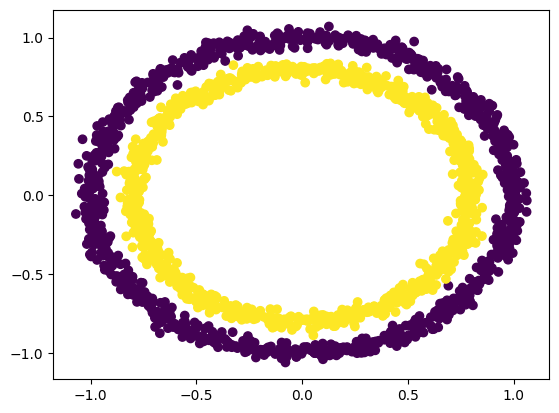

In [9]:
# visualize with a plot
plt.scatter(X[:,0],X[:,1],c=y)

## Input and output shapes 

In [10]:
X.shape, y.shape

((2000, 2), (2000,))

## Steps in modelling

In [18]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(10),#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1)#activation=tf.keras.activations.softmax)
])


# Compile model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


In [12]:
# fit model
model.fit(X,y,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.5977 - mae: 0.5977
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5004 - mae: 0.5004
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5006 - mae: 0.5006
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.5004 - mae: 0.5004
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.5007 - mae: 0.5007
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5008 - mae: 0.5008
Epoch 10/100
63/63 [==============================] - 0s 5ms/step - loss: 0.5005 - mae: 0.5005
Epoch 11/100
63/63 [==============================] - 0s 4m

To visualize our model's predictions, create a function plot_decision_boundary(), this function will:
* Take in a trained model, features(X) and labels(y)
* Create a mesh grid of the different X values 
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [13]:


def plot_decision_boundary(model, X,y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min,  x_max=X[:,0].min()- 0.1, X[:,0].max()+0.1
    y_min,  y_max=X[:,1].min()- 0.1, X[:,1].max()+0.1
    
    xx, yy=  np.meshgrid(np.linspace(x_min,x_max,100),
                         np.linspace(y_min,y_max,100)
                         )
    
    # Create X value (we're going to make predictions on these)
    
    x_in=np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred=model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0])> 1:
        print("doing multiclass classification")
        y_pred=np.argmax(y_pred,axis=1)
    else:
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu) 
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())   
   

doing binary classification


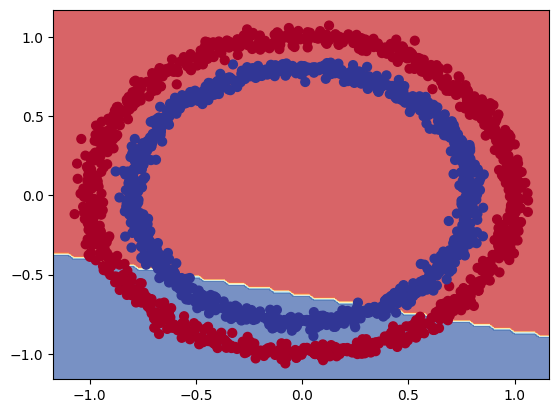

In [14]:
# Check out the predictions our model is making

plot_decision_boundary(model=model,
                       X=X,
                       y=y)

In [15]:
tf.random.set_seed(42)

x_regression=np.arange(0,1000,5)
y_regression=np.arange(100,1100,5)

# split data 
X_reg_train=x_regression[:150]
X_reg_test=x_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


In [19]:
# fit model
model.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: 329.5071 - mae: 329.5071
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 316.4532 - mae: 316.4532
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 303.9292 - mae: 303.9292
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 291.1327 - mae: 291.1327
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 278.1811 - mae: 278.1811
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 264.7294 - mae: 264.7294
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 251.4003 - mae: 251.4003
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 238.1612 - mae: 238.1612
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 225.0844 - mae: 225.0844
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 211.4227 - mae: 211.4227
Epoch 11/100
5/5 [=====================

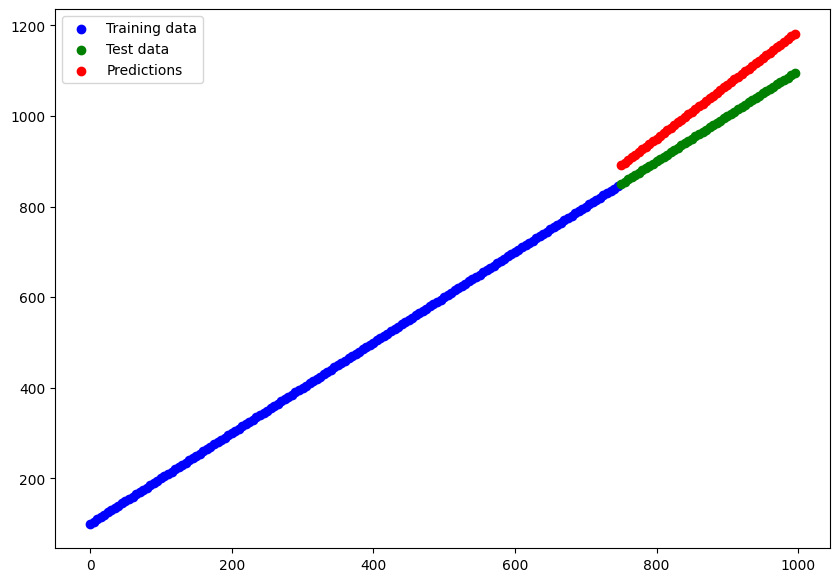

In [20]:
# Make predictions with our  trained model 
y_reg_preds=model.predict(X_reg_test)

# Plot predictions

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")

plt.legend()

## Non-linearity

In [21]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [22]:
# fit model
history=model.fit(X_train,y_train,epochs=60)

Epoch 1/60
50/50 [==============================] - 1s 6ms/step - loss: 0.6868 - accuracy: 0.5081
Epoch 2/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5263
Epoch 3/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.5337
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5437
Epoch 5/60
50/50 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5469
Epoch 6/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5475
Epoch 7/60
50/50 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.5525
Epoch 8/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5537
Epoch 9/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.5587
Epoch 10/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5531
Epoch 11/60
50/50 [

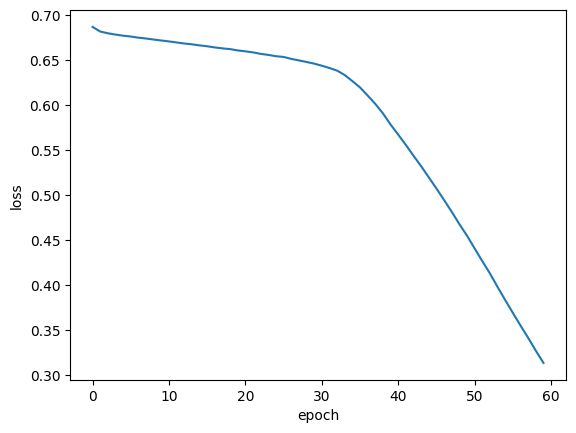

In [23]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

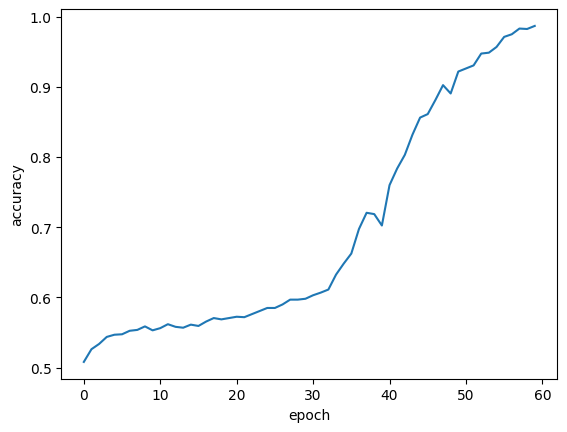

In [24]:
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [25]:
y_preds=model.predict(X_test)

In [26]:
X_train.shape,y_train.shape

((1600, 2), (1600,))

In [ ]:
# Plot predictions

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Test data")
plt.scatter(X_test,y_preds,c="r",label="Predictions")

plt.legend()

doing binary classification


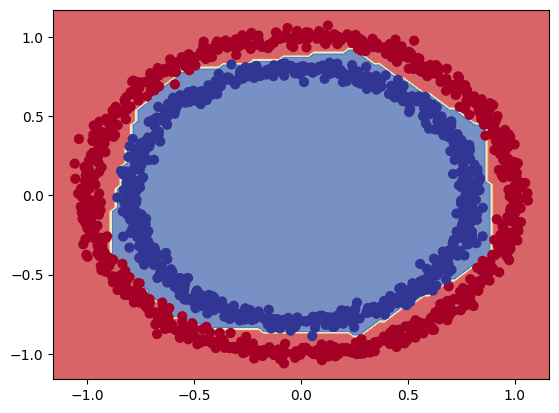

In [28]:
plot_decision_boundary(model,X_train,y_train)

 ## Finding the best learning rate

In [29]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [31]:
# fit the model 

history=model.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.6899 - accuracy: 0.5031 - lr: 1.0000e-04
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5044 - lr: 1.1220e-04
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5069 - lr: 1.2589e-04
Epoch 4/100
50/50 [==============================] - 1s 10ms/step - loss: 0.6867 - accuracy: 0.5094 - lr: 1.4125e-04
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6855 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
50/50 [==============================] - 1s 12ms/step - loss: 0.6846 - accuracy: 0.5106 - lr: 1.7783e-04
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6836 - accuracy: 0.5206 - lr: 1.9953e-04
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5375 - lr: 2.2387e-04
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - los

<AxesSubplot: xlabel='epochs'>

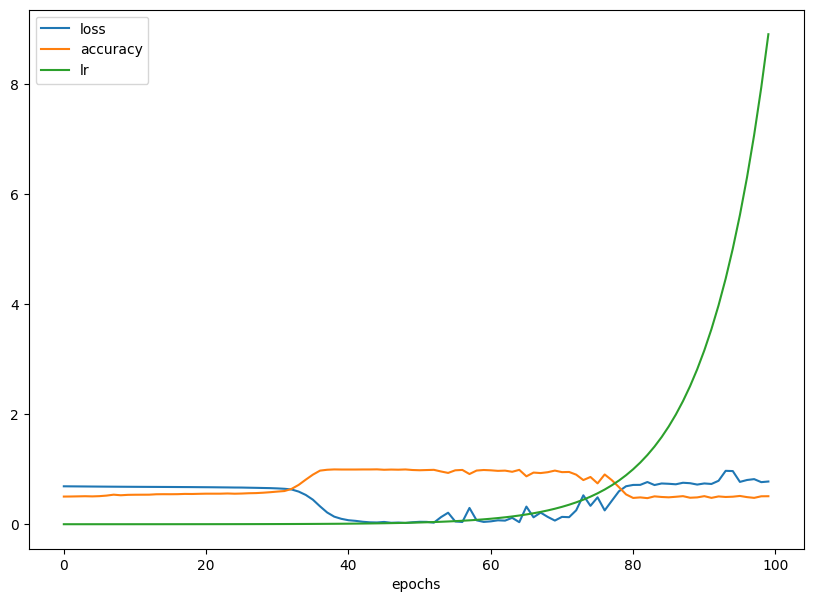

In [32]:
# checout the history 

pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

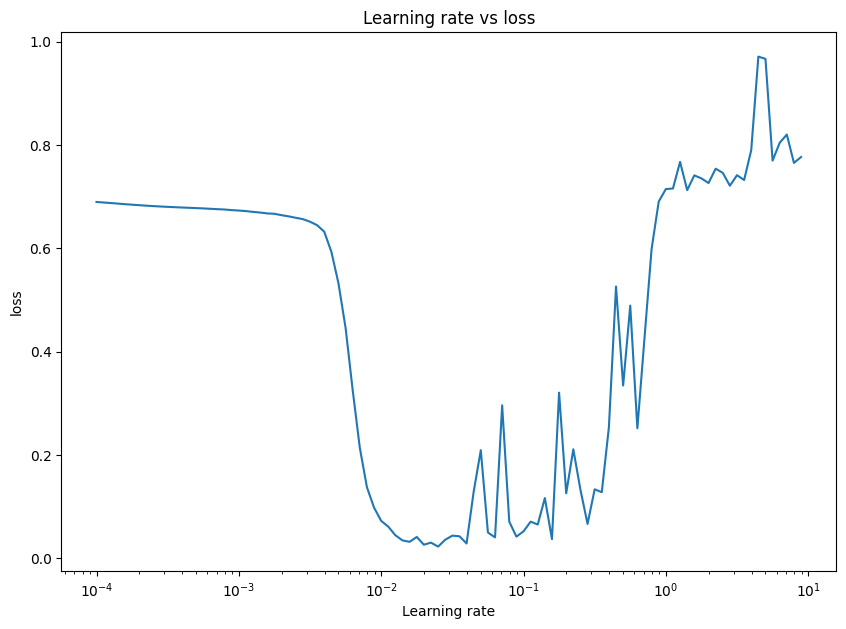

In [35]:
# Plot the learning rate vs loss

lrs= 1e-4* (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

In [36]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [37]:
history=model.fit(X_train,
                    y_train,
                    epochs=20,
                    )

Epoch 1/20
50/50 [==============================] - 1s 6ms/step - loss: 0.6786 - accuracy: 0.5550
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6606
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7119
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8369
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.9706
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9837
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9931
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9950
Epoch 9/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9937
Epoch 10/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9962
Epoch 11/20
50/50 [

doing binary classification
doing binary classification


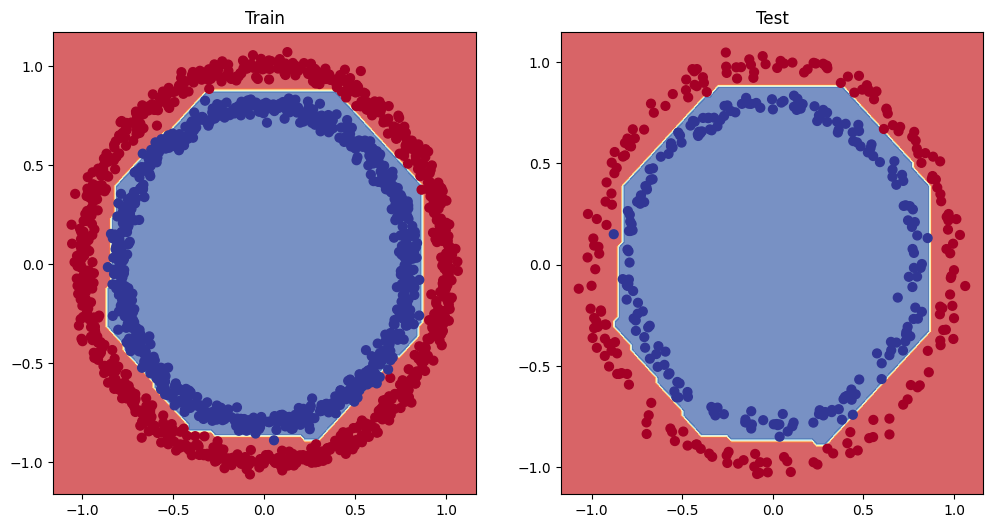

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.show()